## Checkpoint

In [1]:
%matplotlib inline

# Load the modules
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Reload the data
pickle_file = 'notMNIST_noNorm.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  train_features = pickle_data['train_dataset']
  train_labels = pickle_data['train_labels']
  valid_features = pickle_data['valid_dataset']
  valid_labels = pickle_data['valid_labels']
  test_features = pickle_data['test_dataset']
  test_labels = pickle_data['test_labels']
  del pickle_data  # Free up memory

print('Data and modules loaded.')

Data and modules loaded.


## Feature Normalization
 - since we already split data into train and validation, we need to normalize both
 - we also need to normalize test data, so that we can apply our model to predict test data.
 - we save the data after normalization for easy access.

In [2]:
is_features_normal = False

In [3]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    img_min = 0
    img_max = 255
    return a + (image_data - img_min)*(b-a)/ (img_max - img_min)

In [4]:
if not is_features_normal:
    train_features = normalize_grayscale(train_features)
    valid_features = normalize_grayscale(valid_features)
    test_features = normalize_grayscale(test_features)
    is_features_normal = True

#### Save the data for later use

In [5]:
import pickle
import os

In [6]:
pickle_file = 'notMNIST_Norm.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('notMNIST_Norm.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': test_features,
                    'test_labels': test_labels,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


## Checkpoint

In [1]:
%matplotlib inline

# Load the modules
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Reload the data
pickle_file = 'notMNIST_Norm.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  train_features = pickle_data['train_dataset']
  train_labels = pickle_data['train_labels']
  valid_features = pickle_data['valid_dataset']
  valid_labels = pickle_data['valid_labels']
  test_features = pickle_data['test_dataset']
  test_labels = pickle_data['test_labels']
  del pickle_data  # Free up memory

print('Data and modules loaded.')

Data and modules loaded.


## Model

In [2]:
# All the pixels in the image (28 * 28 = 784)
features_count = 784
# All the labels
labels_count = 10

# TODO: Set the features and labels tensors
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# TODO: Set the weights and biases tensors
weights = tf.Variable(tf.truncated_normal((features_count, labels_count)))
biases = tf.Variable(tf.zeros(labels_count))

In [3]:
# Test if definations are correct
from tensorflow.python.ops.variables import Variable

assert features._op.name.startswith('Placeholder'), 'features must be a placeholder'
assert labels._op.name.startswith('Placeholder'), 'labels must be a placeholder'
assert isinstance(weights, Variable), 'weights must be a TensorFlow variable'
assert isinstance(biases, Variable), 'biases must be a TensorFlow variable'

assert features._shape == None or (\
    features._shape.dims[0].value is None and\
    features._shape.dims[1].value in [None, 784]), 'The shape of features is incorrect'
assert labels._shape  == None or (\
    labels._shape.dims[0].value is None and\
    labels._shape.dims[1].value in [None, 10]), 'The shape of labels is incorrect'
assert weights._variable._shape == (784, 10), 'The shape of weights is incorrect'
assert biases._variable._shape == (10), 'The shape of biases is incorrect'

assert features._dtype == tf.float32, 'features must be type float32'
assert labels._dtype == tf.float32, 'labels must be type float32'


In [4]:
# Feed dicts for training, validation, and test session
train_feed_dict = {features: train_features, labels: train_labels}
valid_feed_dict = {features: valid_features, labels: valid_labels}
test_feed_dict = {features: test_features, labels: test_labels}


# Linear Function WX + b
logits = tf.matmul(features, weights) + biases

prediction = tf.nn.softmax(logits)

# Cross entropy
cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

# Training loss
loss = tf.reduce_mean(cross_entropy)

# Create an operation that initializes all variables
init = tf.global_variables_initializer()

# Test Cases
with tf.Session() as session:
    session.run(init)
    session.run(loss, feed_dict=train_feed_dict)
    session.run(loss, feed_dict=valid_feed_dict)
    session.run(loss, feed_dict=test_feed_dict)
    biases_data = session.run(biases)

assert not np.count_nonzero(biases_data), 'biases must be zeros'


In [5]:
# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

print('Accuracy function created.')

Accuracy function created.


## Training the model

Epoch  2/10:   0%|          | 0/1114 [00:00<?, ?batches/s]

Testing --> train_acc:0.7376624345779419, val_acc:0.7390666604042053


Epoch  3/10:   0%|          | 0/1114 [00:00<?, ?batches/s]

Testing --> train_acc:0.7561676502227783, val_acc:0.7587999701499939


Epoch  4/10:   0%|          | 0/1114 [00:00<?, ?batches/s]

Testing --> train_acc:0.7638238072395325, val_acc:0.764533281326294


Epoch  5/10:   0%|          | 0/1114 [00:00<?, ?batches/s]

Testing --> train_acc:0.7694518566131592, val_acc:0.7675999402999878


Epoch  6/10:   0%|          | 0/1114 [00:00<?, ?batches/s]

Testing --> train_acc:0.7744762897491455, val_acc:0.770266592502594


Epoch  7/10:   0%|          | 0/1114 [00:00<?, ?batches/s]

Testing --> train_acc:0.7781956195831299, val_acc:0.7721332907676697


Epoch  8/10:   0%|          | 0/1114 [00:00<?, ?batches/s]

Testing --> train_acc:0.7819640636444092, val_acc:0.7746666073799133


Epoch  9/10:   0%|          | 0/1114 [00:00<?, ?batches/s]

Testing --> train_acc:0.7854868769645691, val_acc:0.776533305644989


Epoch 10/10:   0%|          | 0/1114 [00:00<?, ?batches/s]

Testing --> train_acc:0.7888973355293274, val_acc:0.7781332731246948


Epoch 10/10: 100%|██████████| 1114/1114 [00:10<00:00, 102.19batches/s]


Testing --> train_acc:0.791648268699646, val_acc:0.7802665829658508


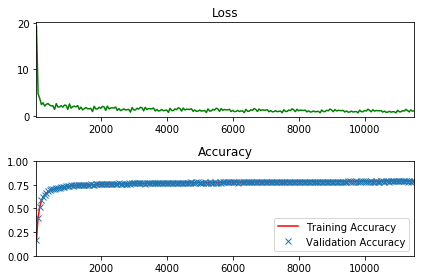

Validation accuracy at 0.7802665829658508


In [10]:
# Change if you have memory restrictions
batch_size = 128

# TODO: Find the best parameters for each configuration
epochs = 10
learning_rate = 0.1



### DON'T MODIFY ANYTHING BELOW ###
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels})

            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
        
        # Print out train accuracy and validation accuracy
        training_acc = session.run(accuracy, feed_dict=train_feed_dict)
        print('Testing --> train_acc:{}, val_acc:{}'.format(training_accuracy, validation_accuracy))
        
    # save the model
    saver = tf.train.Saver()
    saver.save(session, './model/linear_model.ckpt')

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

### Hyperparameter tunning tactics:
we can adapt following strategies to tune epochs and learning_rate:
 - print out training accuracy and validation accuracy in each epoch.
 - start with a higher learning rate like 0.1, and small epochs = 3
 - if trainig accuracy is not improving, the learning rate is too high. Need to lower learning rate = 0.05.
 - if training accuracy and validation accuracy both increasing, give more epoches to try, like epochs= 8.
 - if training accuracy keep improving but validation accuracy stops, try lower the learning rate.
 
 It is not necessary to start with a huge epochs value. It is just too computational expensive.

## Test

In [28]:
### DON'T MODIFY ANYTHING BELOW ###
# The accuracy measured against the test set
test_accuracy = 0.0

save_model_path  = './model/linear_model.ckpt'

with tf.Session() as session:
    
    session.run(init)
    
    # load model   
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(session, save_model_path)
    # print(session.run(biases))
    
    # Check accuracy against Test data
    test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)
    
    
assert test_accuracy >= 0.80, 'Test accuracy at {}, should be equal to or greater than 0.80'.format(test_accuracy)
print('Nice Job! Test Accuracy is {}'.format(test_accuracy))

Nice Job! Test Accuracy is 0.8554000854492188
